# Set-Up

The dataset comprises data of donations received by a non-profit organisation in the past:

Link - https://assets.datacamp.com/production/repositories/1441/datasets/7abb677ec52631679b467c90f3b649eb4f8c00b2/basetable_ex2_4.csv


Source: DataCamp

<br>

Variable Description:

- 'target' - binary values indicating whether a donation was made

- 'time_since_first_gift' & 'time_since_last_gift' - exactly as the name suggests, displayed as number of months

###Project Goal

A message needs to be sent to the donors to donate for a specific project. Sending a message to all donors will be very expensive; it would be better to send a message to a smaller subset of donors who are most likely to donate. The objective is to use Python and Machine Learning to identify which donors are most likely to donate.

###Importing Data

In [1]:
import pandas as pd

#donations = pd.read_csv('Nonprofit Donations.csv')

path = 'https://raw.githubusercontent.com/ashwinsingh7/Donor-Targeting/refs/heads/main/Nonprofit%20Donations.csv'

donations = pd.read_csv(path)

print(type(donations))

<class 'pandas.core.frame.DataFrame'>


# Exploratory Data Analysis

###Data Inspection

In [2]:
#first 5 rows

donations.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166,87,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90,90,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125,74,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117,97,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80,80,80.00,1


In [3]:
#last 5 rows

donations.tail()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
24995,0,1,0,0,1,0,0,66,406,2662,94,43,68.625000,8
24996,0,0,0,0,0,1,0,50,621,2463,132,117,124.500000,2
24997,0,0,0,0,0,1,0,80,874,2143,117,90,103.500000,2
24998,0,0,1,0,1,0,0,85,964,2375,108,62,78.666667,3
24999,0,1,0,1,1,0,0,41,1291,2200,116,62,93.714286,7


In [4]:
#summary statistics

donations.describe()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.00000
mean,0.047480,0.50316,0.164320,0.208200,0.402920,0.495160,0.101920,53.605080,757.845560,2152.18212,111.167640,69.830680,90.455932,5.22572
std,0.212667,0.50000,0.370573,0.406029,0.490495,0.499987,0.302549,17.382771,342.286498,658.40422,20.377627,20.085216,15.466240,2.83908
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,32.000000,32.00000,18.000000,2.000000,18.000000,1.00000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,519.000000,1915.00000,99.000000,56.000000,80.666667,3.00000
50%,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,736.000000,2414.00000,112.000000,69.000000,90.571429,5.00000
75%,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,64.000000,985.000000,2633.00000,125.000000,82.000000,100.444444,7.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,109.000000,2305.000000,2771.00000,194.000000,194.000000,194.000000,18.00000


In [5]:
#data types and missing values

donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target                 25000 non-null  int64  
 1   gender_F               25000 non-null  int64  
 2   income_high            25000 non-null  int64  
 3   income_low             25000 non-null  int64  
 4   country_USA            25000 non-null  int64  
 5   country_India          25000 non-null  int64  
 6   country_UK             25000 non-null  int64  
 7   age                    25000 non-null  int64  
 8   time_since_last_gift   25000 non-null  int64  
 9   time_since_first_gift  25000 non-null  int64  
 10  max_gift               25000 non-null  int64  
 11  min_gift               25000 non-null  int64  
 12  mean_gift              25000 non-null  float64
 13  number_gift            25000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.7 MB


In [6]:
print(f'Percentage of donors who donated = {(sum(donations["target"])/25000) * 100}% = the likelihood that a randomly selected person will donate')

Percentage of donors who donated = 4.748% = the likelihood that a randomly selected person will donate


In [7]:
# Count and print the number of females.
print(f'Number of female donors = {sum(donations["gender_F"])}')

Number of female donors = 12579


In [8]:
print(f'Number of male donors = {len(donations)-12579}')

Number of male donors = 12421


# Modelling

We are faced with a classification problem where we need to predict a binary output corresponding to whether a donor will donate or not.

To tackle this, we will use logistic regression. Logistic regression, by definition, is a regression algorithm since it produces a continuous numerical output; however, since it can be used to predict probabilities and odds, it is also widely used for binary classification.

In **logistic regression**, we have

Y = B_0 + B_1\*X1 + B_2\*X2 + ... + B_n\*X_n

Where Y = ln(odds of donation) = ln(p/(1-p))    ->     [where p is the probability of a donation]

=> ln(p/(1-p)) = B_0 + B_1\*X1 + B_2\*X2 + ... + B_n\*X_n

<br>

So, for any given log odds:
- p = 1/(1+e^(-ln_odds)) = 1/(1+e^(-(B_0 + B_1\*X1 + B_2\*X2 + ...))

Where p = Prob(Y=1|X)

- Generally we can say that if for p>=0.5, the model predicts that a donation will be made, and for p\<0.5 the model predicts that a donation will not be made

- (Y|X1=X2=...Xn=0) = B_0 => When all Xs are 0, log(odds of donation) = B_0

- B_i can be interpreted as the change in log(odds of donation) when Xi is increased by 1 unit and all Xj (j!=i) remain constant

<br>

Goodness of Fit:
- Larger log likelihood is better, its value ranges from 0 to -infinity
- A model with a good fit will have log likelihood closer to zero
- pseudo Rsq = [LL(null model) - LL(fit)]/LL(null)

And so, 0<=Rsq<=1, where Rsq moves closer to 0 as model fit improves. Rsq approximately tells us the effect size of the relationship b/w the target and predictor variables

- p-value goes from 1 to 0 and values <= 0.05 show that the relationship between the target and predictor is most likely not due to chance (i.e., statistically significant)




**Variable Selection**:

It is important to choose the appropriate set of variables for any given prediction problem. The goal of variable selection is to select the set of variables that has optimal performance.
However, it is also vital to not choose to many predictor variables as it may lead to drawbacks such as:
- Over-fitting (performing very well on training data but not performing well on previously unseen data)
- Hard to maintain or implement
- Hard to interpret (may have multicollinearity - which refers to when 2 or more predictor variables are highly correlated which leads to difficulty in differentiating their impact on the target variable and may also lead to distorted model coefficients)

<br>

Therefore, an optimal approach would be to balance model complexity with performance. This can be achieved by doing a train-test split.


In order to properly evaluate a model, one can partition the data into a train and test set. The train set contains the data the model is built/trained on, and the test data is used to evaluate the model. This division is done randomly, but when the target incidence is low (as is the case for our data), it could be necessary to stratify, that is, to make sure that the train and test data contain an equal percentage of targets.

###Train-Test Split

In [362]:
# Load the partitioning module
from sklearn.model_selection import train_test_split

# Create DataFrames with variables and target
X = donations.drop('target',axis=1)
y = donations["target"]

# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Check whether train and test have same percentage targets
print(round(sum(train["target"])/len(train), 2))
print(round(sum(test["target"])/len(test), 2))

0.05
0.05


###Forward Stepwise Variable Selection

In this process we will sequentially add predictor variables to our model based on their AUC.
AUC is the area under the ROC (Receiver Operator Characteristic) curve. It lies between 0 and 1 (inclusive).

The ROC curve uses the true positive rate (TPR) on the Y axis and false positive (FPR) rate on the x axis. The curve is obtained by joining points correspnding to the (TPR,FPR) pairs for different configurations of a classifier.

A higher AUC corresponds to a better model as a higher area under the curve usually arises from better classification performance.

TPR = the proportion of donors that were also predicted to be donors

FPR = the proportion of non-donors that were incorrectly predicted to be donors

In [363]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

#defining a function to calculate AUC

def auc(variables, target, basetable):

  '''
  inputs:

  variables - list of strings
  target - list with single string
  basetable - name of dataframe

  '''


  X = basetable[variables]
  y = basetable[target]

  logreg = linear_model.LogisticRegression()
  logreg.fit(X, y)

  predictions = logreg.predict_proba(X)[:,1]

  #print(predictions)

  auc = roc_auc_score(y, predictions)

  return auc

In [364]:
#defining a function for calculating the next best predictor variable


def next_best(current_variables,candidate_variables,target,basetable):

  '''
  inputs:

  current_variables - list of strings (names of predictive variables that are currently included in the model)
  candidate_variables - list of strings (names of predictive variables that we wish to potentially add to the model)
  target - list with single string (name of the target variable)
  basetable - name of dataframe
  '''

  best_auc = -1
  best_var = ''

  for var in candidate_variables:

    AUC = auc(current_variables + [var],target,basetable)

    if AUC > best_auc:
      best_auc = AUC
      best_var = var

    print(f'AUC for {var} as the additional predictor is {round(AUC,7)}')

  print(f'\n\nTherefore, {best_var} is the best additional predictor with an AUC of {round(best_auc,7)} for the model with {current_variables + [best_var]}')
  print('')

  return best_var

In [365]:
# Find the candidate variables (excluding country)
candidate_variables = list(train.columns.values)
candidate_variables.remove("target")
candidate_variables.remove("country_USA")
candidate_variables.remove("country_UK")
candidate_variables.remove("country_India")

# Initialize the current variables
current_variables = []

# The forward stepwise variable selection procedure
number_iterations = len(candidate_variables)
for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables,["target"],train)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

AUC for gender_F as the additional predictor is 0.5093176
AUC for income_high as the additional predictor is 0.5203177
AUC for income_low as the additional predictor is 0.5234052
AUC for age as the additional predictor is 0.5402859
AUC for time_since_last_gift as the additional predictor is 0.6231026
AUC for time_since_first_gift as the additional predictor is 0.5951895
AUC for max_gift as the additional predictor is 0.7147175
AUC for min_gift as the additional predictor is 0.573617
AUC for mean_gift as the additional predictor is 0.6866319
AUC for number_gift as the additional predictor is 0.6838476


Therefore, max_gift is the best additional predictor with an AUC of 0.7147175 for the model with ['max_gift']

Variable added in step 1 is max_gift.
AUC for gender_F as the additional predictor is 0.7151498
AUC for income_high as the additional predictor is 0.7159272


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

AUC for income_low as the additional predictor is 0.7163986
AUC for age as the additional predictor is 0.716568
AUC for time_since_last_gift as the additional predictor is 0.7401418
AUC for time_since_first_gift as the additional predictor is 0.7184254
AUC for min_gift as the additional predictor is 0.7148648


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

AUC for mean_gift as the additional predictor is 0.7163376
AUC for number_gift as the additional predictor is 0.7399895


Therefore, time_since_last_gift is the best additional predictor with an AUC of 0.7401418 for the model with ['max_gift', 'time_since_last_gift']

Variable added in step 2 is time_since_last_gift.
AUC for gender_F as the additional predictor is 0.7405652
AUC for income_high as the additional predictor is 0.741327


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

AUC for income_low as the additional predictor is 0.7412162
AUC for age as the additional predictor is 0.7424099
AUC for time_since_first_gift as the additional predictor is 0.7457404
AUC for min_gift as the additional predictor is 0.7401526


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

AUC for mean_gift as the additional predictor is 0.7414224
AUC for number_gift as the additional predictor is 0.7620897


Therefore, number_gift is the best additional predictor with an AUC of 0.7620897 for the model with ['max_gift', 'time_since_last_gift', 'number_gift']

Variable added in step 3 is number_gift.
AUC for gender_F as the additional predictor is 0.7623686


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for income_high as the additional predictor is 0.7633832
AUC for income_low as the additional predictor is 0.7634697
AUC for age as the additional predictor is 0.7638894


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for time_since_first_gift as the additional predictor is 0.7620446
AUC for min_gift as the additional predictor is 0.7699144
AUC for mean_gift as the additional predictor is 0.7731894


Therefore, mean_gift is the best additional predictor with an AUC of 0.7731894 for the model with ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift']

Variable added in step 4 is mean_gift.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for gender_F as the additional predictor is 0.7733398
AUC for income_high as the additional predictor is 0.7743497


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for income_low as the additional predictor is 0.7742886
AUC for age as the additional predictor is 0.7750154
AUC for time_since_first_gift as the additional predictor is 0.7733597


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for min_gift as the additional predictor is 0.7730752


Therefore, age is the best additional predictor with an AUC of 0.7750154 for the model with ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age']

Variable added in step 5 is age.
AUC for gender_F as the additional predictor is 0.708991


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

AUC for income_high as the additional predictor is 0.7760541


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for income_low as the additional predictor is 0.7758929


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for time_since_first_gift as the additional predictor is 0.6522004
AUC for min_gift as the additional predictor is 0.7748587


Therefore, income_high is the best additional predictor with an AUC of 0.7760541 for the model with ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high']

Variable added in step 6 is income_high.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

AUC for gender_F as the additional predictor is 0.7688549


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for income_low as the additional predictor is 0.758542


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for time_since_first_gift as the additional predictor is 0.6706531


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

AUC for min_gift as the additional predictor is 0.7659449


Therefore, gender_F is the best additional predictor with an AUC of 0.7688549 for the model with ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F']

Variable added in step 7 is gender_F.
AUC for income_low as the additional predictor is 0.7442604


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

AUC for time_since_first_gift as the additional predictor is 0.7059804
AUC for min_gift as the additional predictor is 0.7666539


Therefore, min_gift is the best additional predictor with an AUC of 0.7666539 for the model with ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F', 'min_gift']

Variable added in step 8 is min_gift.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

AUC for income_low as the additional predictor is 0.6835349
AUC for time_since_first_gift as the additional predictor is 0.6535065


Therefore, income_low is the best additional predictor with an AUC of 0.6835349 for the model with ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F', 'min_gift', 'income_low']

Variable added in step 9 is income_low.
AUC for time_since_first_gift as the additional predictor is 0.6616554


Therefore, time_since_first_gift is the best additional predictor with an AUC of 0.6616554 for the model with ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F', 'min_gift', 'income_low', 'time_since_first_gift']

Variable added in step 10 is time_since_first_gift.
['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F', 'min_gift', 'income_low', 'time_since_first_gift']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [366]:
print(current_variables)

['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F', 'min_gift', 'income_low', 'time_since_first_gift']


In [ ]:
#logred.predict_proba

In [ ]:
#var_list_no_country = ['gender_F','income_high','income_low','age','time_since_last_gift','time_since_first_gift','max_gift','min_gift','mean_gift','number_gift']

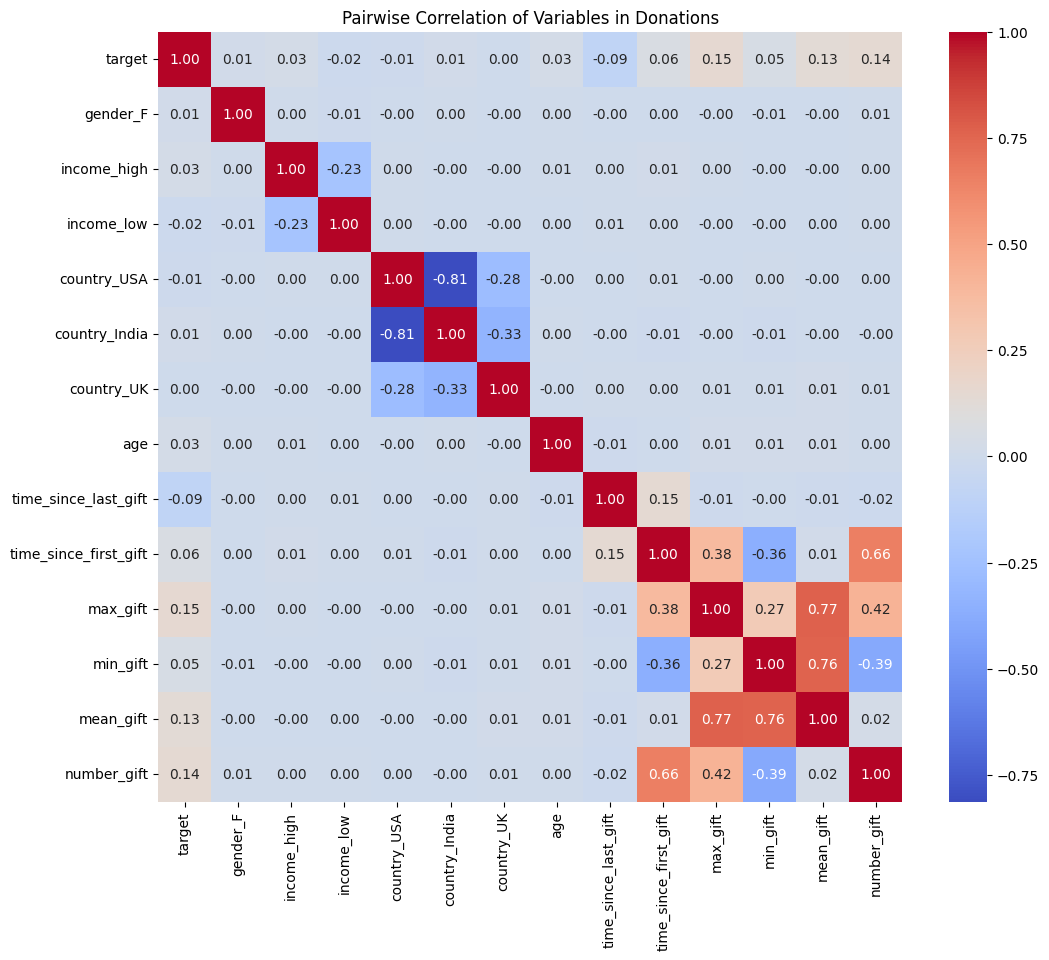

In [345]:
# chart for pairwise correlation of all variables in donation

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'donations' DataFrame is already loaded as in your provided code.

# Calculate the correlation matrix
correlation_matrix = donations.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation of Variables in Donations')
plt.show()


###Selecting Variables for Optimal Generalisation and Avoiding Overfitting

In the forward stepwise variable selection process above, we find that the variables were selected (excluding country variables) in the following sequence:

['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F', 'min_gift', 'income_low', 'time_since_first_gift']


<br>

However, instead of blindly including all variables as predictors, we need to find the optimal balance between performance and model complexity.

In other words, we want our model to generalise well - that is, we want it to learn broad patterns so that it can perform well on previously unseen data.
This is where the train test split is helpful. It allows us to build the model using training data and evaluate its performance on previously unseen observations with the test data.

Generally, we find that as more predictor variables are added - training performance keeps improving, but after a point, the test performance starts declining.

When the test performance starts declining, the model is overfitting - which means that it is learning patterns that are very specific to the training data but may not have wider applicability to previously unseen data.

<br>

Therefore, our aim is to pick a number of predictor variables that maximises test set performance and consequently, gives us a model that generalises well (and is neither overfitting nor underitting to the training data).



In [367]:
# specify a function auc_train_test that takes in (variables,target,train set,test set)
# and calculates the AUC of a model that is built on train_set and evaluated on test_set

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

def auc_train_test(variables, target, train_set, test_set):
    # Initialize the logistic regression model
    model = LogisticRegression()

    # Fit the model on the training data
    model.fit(train_set[variables], train_set[target])

    # Make predictions on the test data
    predictions_test = model.predict_proba(test_set[variables])[:, 1]
    predictions_train = model.predict_proba(train_set[variables])[:, 1]

    # Calculate the AUC score
    auc_train = roc_auc_score(train_set[target], predictions_train)
    auc_test = roc_auc_score(test_set[target], predictions_test)

    return auc_train, auc_test


The forward stepwise variable selection procedure provides an order in which variables are optimally added to the predictor set. In order to decide where to cut off the variables, we can make the train and test AUC curves. These curves plot the train and test AUC using the first, first two, first three, … variables in the model.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

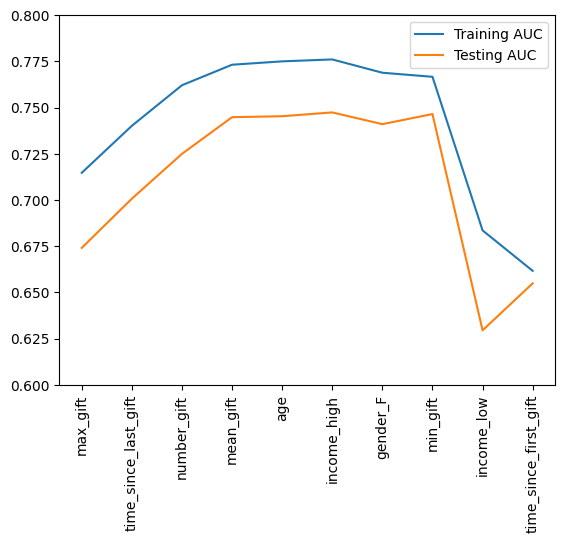

In [368]:
#keep variables as the list of predictors in order of stepwise selection

#variables_except_country = ['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'age', 'gender_F', 'income_low', 'income_high', 'min_gift', 'time_since_first_gift']

variables_except_country = current_variables


# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []

# Add variables one by one
variables_evaluate = []

# Iterate over the variables in variables
for v in variables_except_country:

    # Add the variable
    variables_evaluate.append(v)

    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate, ["target"], train, test)

    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables_except_country, rotation = 90)
plt.plot(x,y_train, label='Training AUC')
plt.plot(x,y_test, label='Testing AUC')
plt.ylim((0.6, 0.8))
plt.legend()
plt.show()

In [369]:
print(auc_values_train)
print(auc_values_test)
print(variables_except_country)

[0.7147174747893356, 0.7401418427959663, 0.7620897085232766, 0.7731893907998343, 0.7750154441221164, 0.7760540958695953, 0.7688549247133584, 0.7666539024727173, 0.6835348528802321, 0.661655422019616]
[0.6740800881620013, 0.700702319479178, 0.724962815514457, 0.7447979369808235, 0.7453206015780928, 0.7473846838012067, 0.7410250072862988, 0.7465058985800355, 0.6294786376348629, 0.6548783653177491]
['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high', 'gender_F', 'min_gift', 'income_low', 'time_since_first_gift']


We observe that Training AUC starts declining after income_high is added as a predictor. So a good cutoff seems to be the first 6 variables which give us a testing and training AUC of around 0.75

# Evaluating Model Performance

###AUC Shortcoming

Although the AUC is useful, it is a rather complex and unintuitive evaluation measure, and so it is not a good choice for an evaluation metric that can be discussed with business stakeholders.

Furthermore, it is a single number that fails to capture more nuanced information about the model.

We can instead look at evaluation curves for a more interpretable model evaluation framework.

###Cumulative Gains Curve

A Cumulative Gains Curve (also known as a Lift Curve) is used to assess the performance of classification models. It shows the proportion of true positives captured as a function of the proportion of the dataset considered.

Steps to Plot a Cumulative Gains Curve in Python:

1. Sort data by model probabilities (descending order).

2. Calculate cumulative true positives.

3. Normalize by the total number of positives.

4. Plot cumulative gains vs. percentage of data.

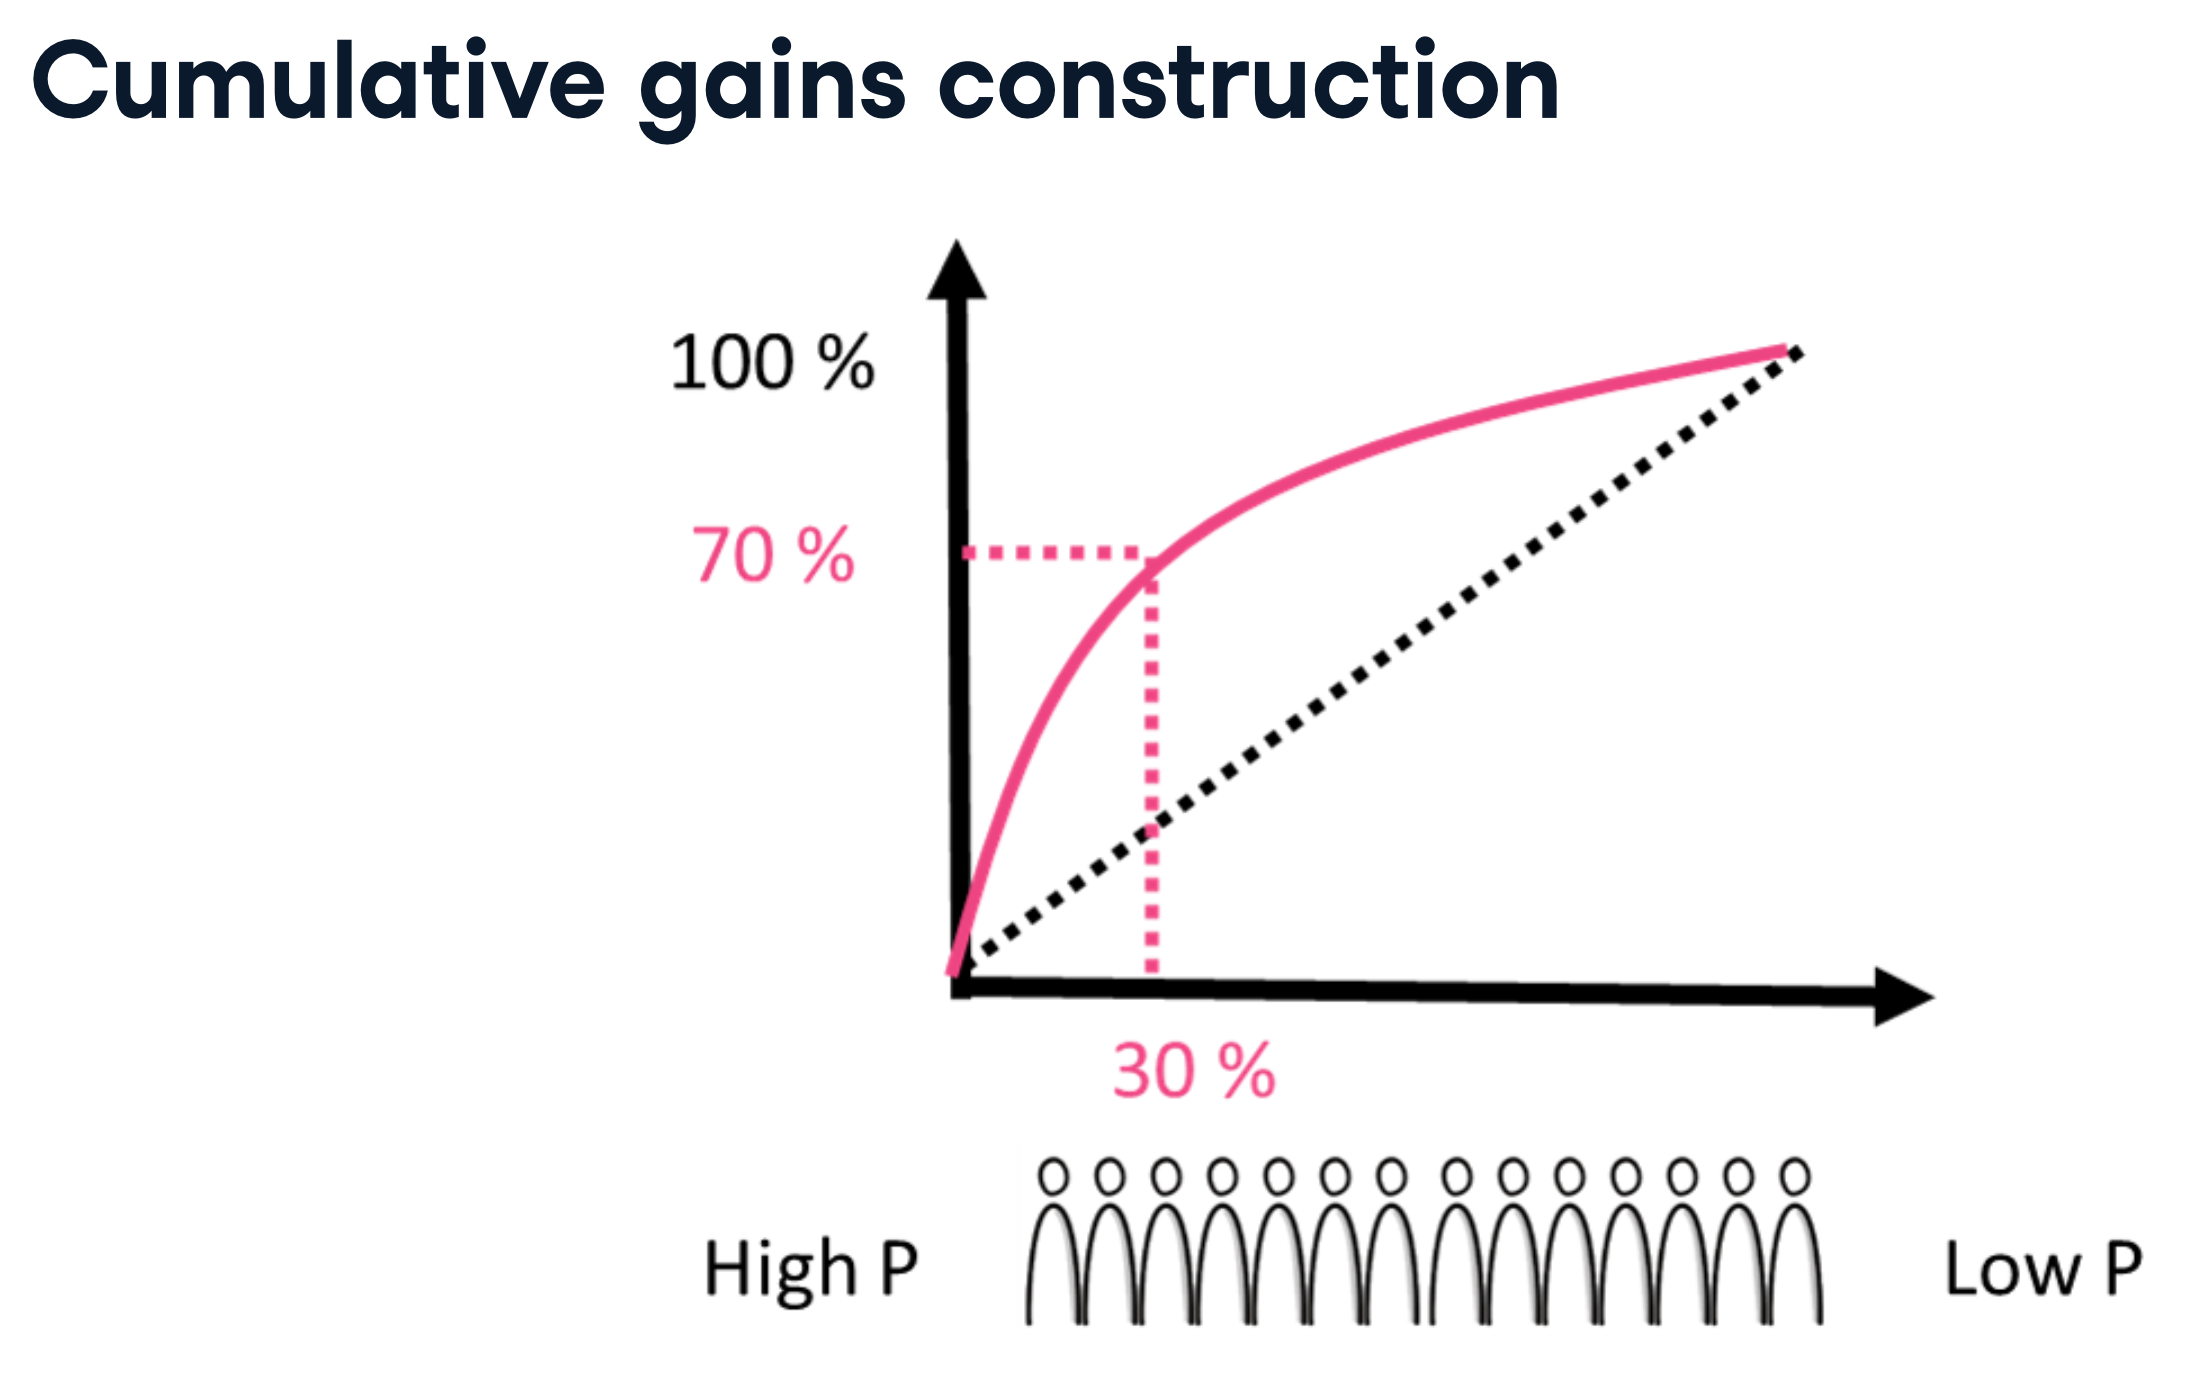



Axes of the Cumulative Gains Curve:

X-axis (Percentage of Data Considered) - Represents the proportion of the dataset examined, sorted by predicted probability in descending order.
Starts from 0% (no data considered) and goes up to 100% (entire dataset considered).

Y-axis (Percentage of Positive Class Captured) - Represents the proportion of actual positive cases (e.g., customers who will buy, fraud cases detected, or in our case - **percentage of donors correctly identified**) that have been identified as we move through the sorted dataset.
Starts from 0% (no positives captured) and goes up to 100% (all positives captured).

<br>

How to Interpret the Chart:
Steep Initial Rise → Good Model Performance

If the curve rises sharply at the beginning, the model is effectively ranking true positives higher.
This means a small percentage of the dataset contains a high percentage of the actual positive cases.

Diagonal Line (Baseline) → Random Model - The dashed diagonal line represents a random classifier. A model performing no better than random guessing will follow this line.

Higher Curve → Better Model - The further the cumulative gains curve is above the diagonal, the better the model at distinguishing between positive and negative cases.

Flattening of the Curve - As the dataset percentage increases, the curve levels off because fewer remaining instances are positive. If the curve reaches 100% quickly, the model is very good.

<br>

Example Interpretation:
Suppose at 20% of the dataset, the curve shows 70% of positives captured.
This means that by selecting just 20% of the highest-scoring instances, we have already identified 70% of all actual positive cases.
A well-performing model should have a steep rise and then flatten out near 100% early on.

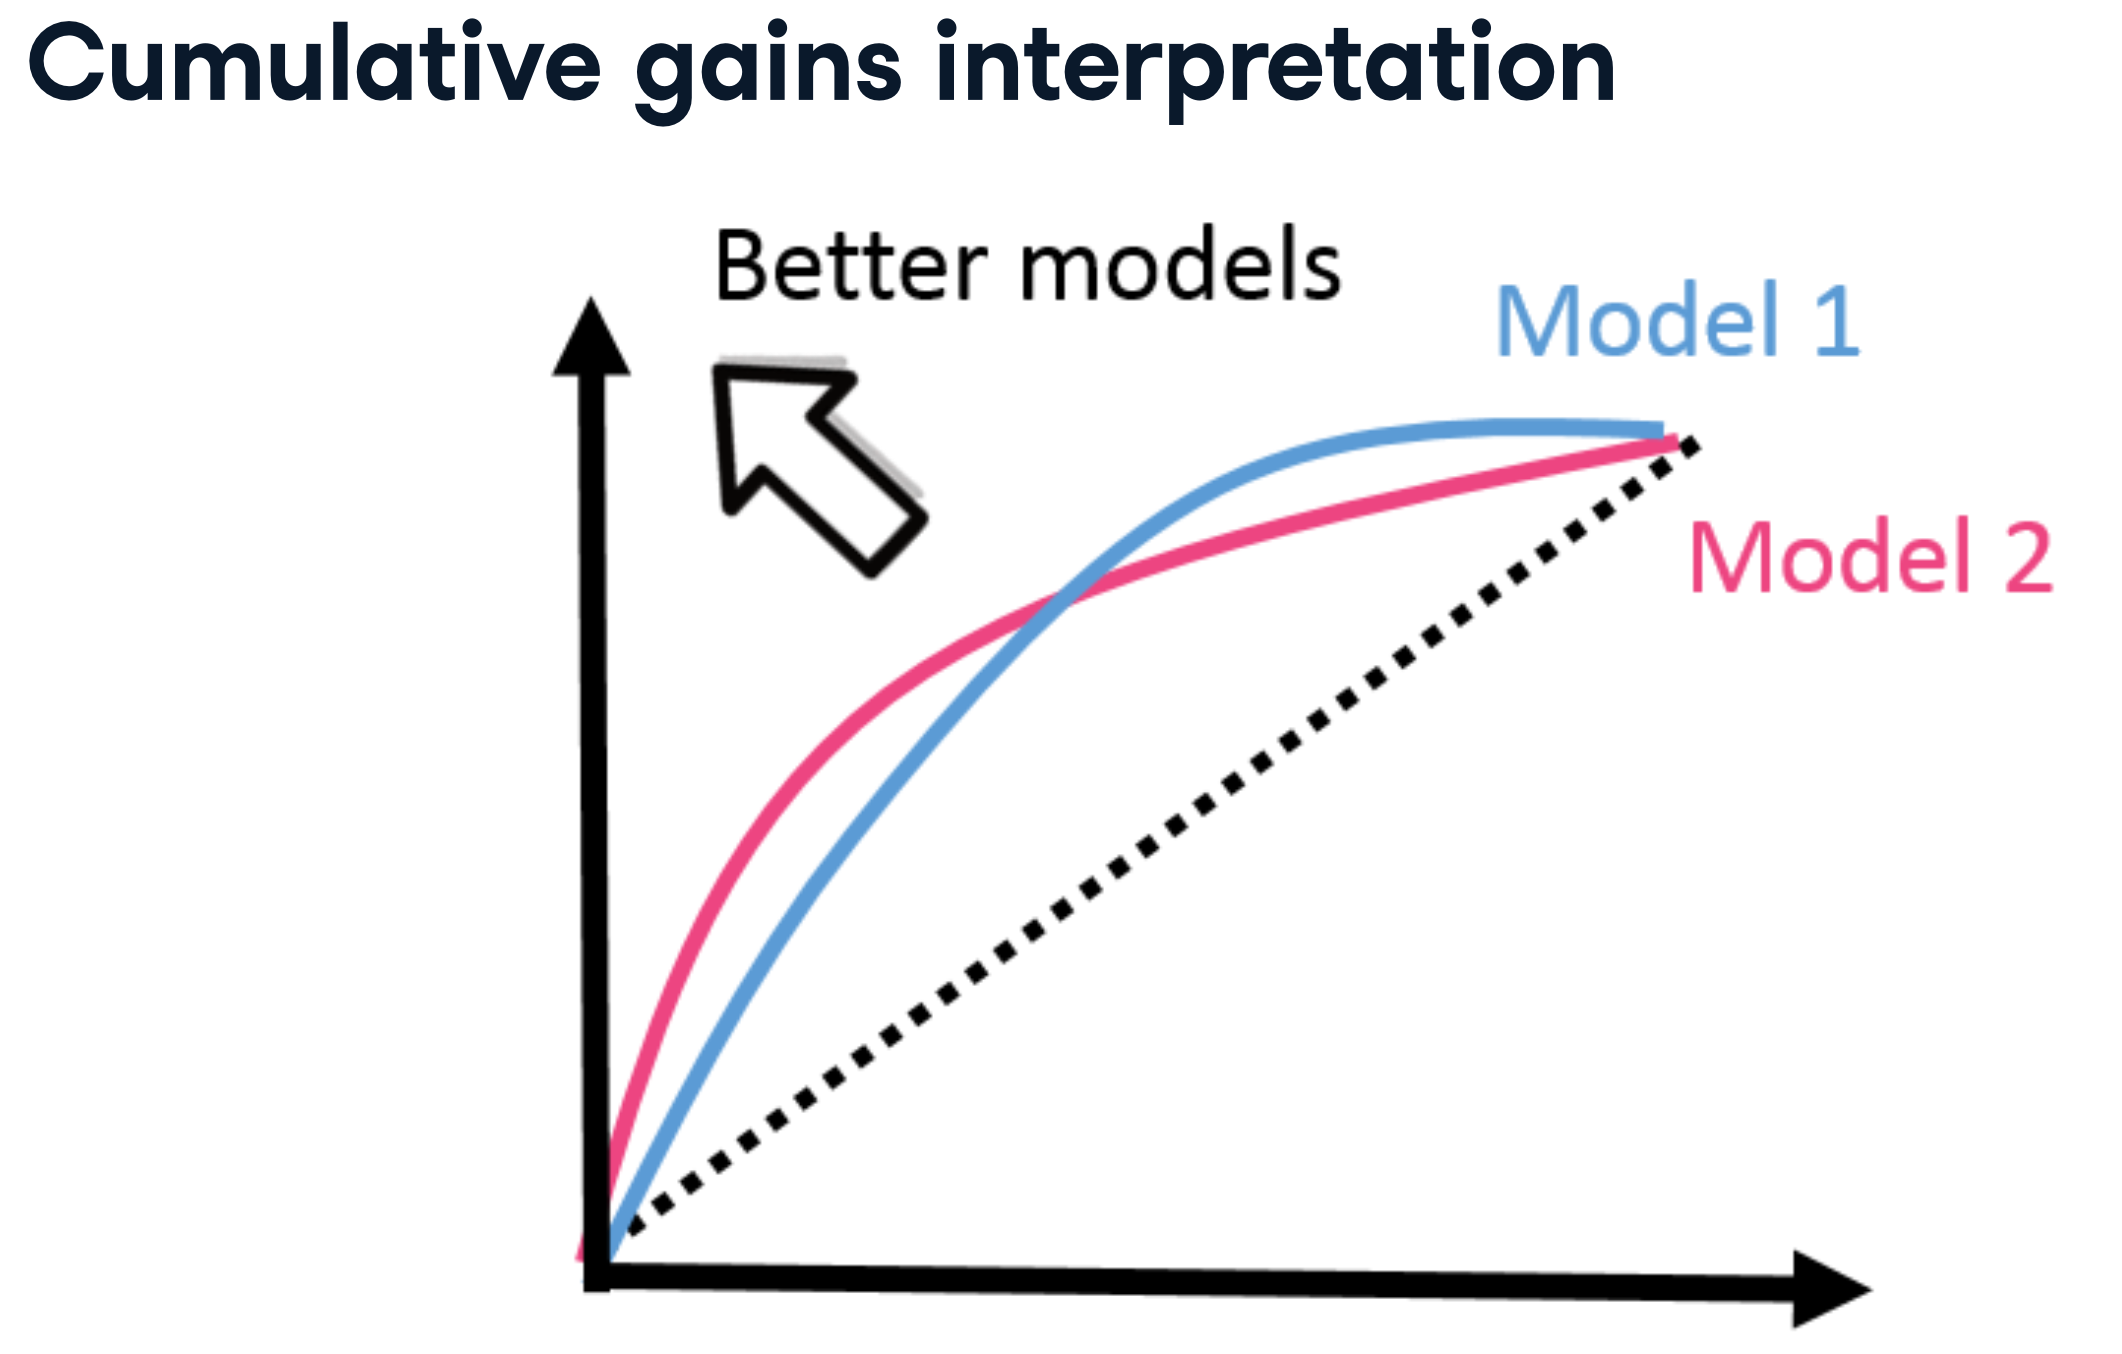

In [370]:
#taking a look at the test set

test.head()

,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,target
19157,1,0,0,1,0,0,39,620,2083,135,75,105.800000,5,0
17097,1,0,1,0,1,0,72,219,2285,86,58,70.833333,6,0
14054,1,0,0,0,1,0,59,1276,2749,134,84,115.875000,8,0
19325,0,0,0,0,1,0,36,1013,2511,92,71,85.800000,5,0
15763,1,1,0,0,1,0,30,471,1860,133,55,88.166667,6,0


In [371]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 19157 to 7353
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender_F               5000 non-null   int64  
 1   income_high            5000 non-null   int64  
 2   income_low             5000 non-null   int64  
 3   country_USA            5000 non-null   int64  
 4   country_India          5000 non-null   int64  
 5   country_UK             5000 non-null   int64  
 6   age                    5000 non-null   int64  
 7   time_since_last_gift   5000 non-null   int64  
 8   time_since_first_gift  5000 non-null   int64  
 9   max_gift               5000 non-null   int64  
 10  min_gift               5000 non-null   int64  
 11  mean_gift              5000 non-null   float64
 12  number_gift            5000 non-null   int64  
 13  target                 5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [372]:
#getting predictions for each value in the test set

predictors = variables_except_country[:6]
print(predictors)

#predictions_test = model.predict_proba(test[predictors])[:, 1]

['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high']


In [379]:
X = train[predictors]
y = train['target']

model = linear_model.LogisticRegression()
model.fit(X, y)

predictions_test = model.predict_proba(test[predictors])[:,1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [380]:
print(type(predictions_test))
print(len(predictions_test))
print(max(predictions_test),min(predictions_test),np.mean(predictions_test))

<class 'numpy.ndarray'>
5000
0.655469751380133 0.00021584022760554473 0.04600543822577411


In [376]:
#convert to dataframe

#predictions_test = pd.DataFrame(predictions_test)

#predictions_test

# add a column to predictions_test which is 1 - col 0
'''
predictions_test[1] = 1 - predictions_test[0]

predictions_test
'''

'\npredictions_test[1] = 1 - predictions_test[0]\n\npredictions_test\n'

In [381]:
targets_test = np.array(test['target'])

print(targets_test)
print(predictions_test)


[0 0 0 ... 0 0 0]
[0.05955479 0.02726624 0.08391014 ... 0.02125818 0.16636146 0.06475227]


In [396]:
# cumuulative gains functions


def cumulative_gains_curve(y_true, y_probs):
    """
    Plots the Cumulative Gains Curve.

    Parameters:
    y_true (array-like): True binary labels (0 or 1)
    y_probs (array-like): Predicted probabilities for the positive class

    """
    # Sort by predicted probability in descending order
    sorted_indices = np.argsort(y_probs)[::-1]
    y_true_sorted = np.array(y_true)[sorted_indices]

    # Compute cumulative gains
    cum_true_positives = np.cumsum(y_true_sorted)
    total_positives = np.sum(y_true_sorted)

    # Normalize
    cumulative_gains = cum_true_positives / total_positives
    percentages = np.linspace(0, 1, len(y_true))

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(percentages, cumulative_gains, label="Cumulative Gains Curve", color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Model (Baseline)")
    plt.xlabel("Percentage of Test Data Considered")
    plt.ylabel("Percentage of Donors Captured")
    plt.title("Cumulative Gains Curve")
    plt.legend()
    plt.grid()
    plt.show()


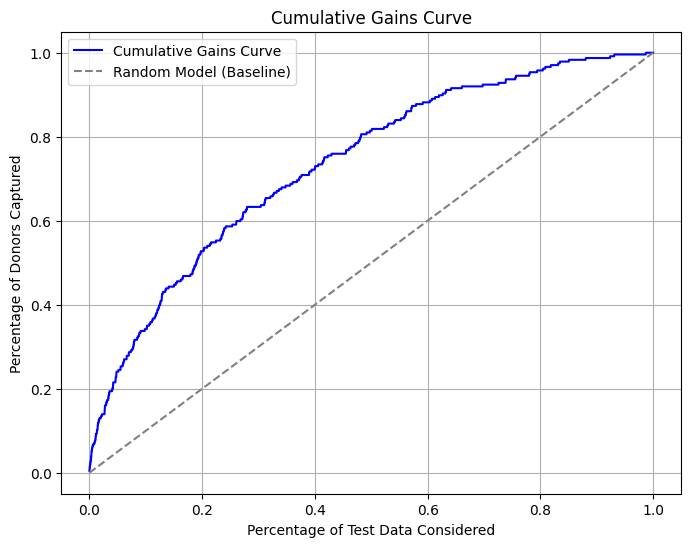

In [397]:
# plotting cumulative gains curve

cumulative_gains_curve(targets_test,predictions_test)

####Interpretation of the Cumulative Gains Curve (CGC)

<br>

Key Observations:
Steep Initial Rise → Model is Effective

The curve rises sharply in the first 20% of the data, meaning the logistic regression model effectively identifies a large proportion of likely donors early on.
At 20% of the test data, approximately 60% of donors have been captured, indicating strong predictive power.

<br>

Above the Random Model Baseline → Good Model Performance

The blue curve is well above the diagonal (random model), meaning the model significantly improves targeting over random outreach.

<br>

Slower Gains After ~60% Data Considered → Diminishing Returns

Beyond 60% of the data, the curve flattens, meaning additional outreach brings in fewer new donors.
By reaching 80% of the data, nearly 95-100% of donors have been captured.

Estimating Cost Savings from the Model

<br>


The non-profit wants to limit outreach costs by only contacting likely donors.

<br>

Cost Savings Approach:
Without Prediction (Random Outreach)
To reach 80% of donors, they would need to contact 80% of the database.
With Prediction (using the logistic regression model), to reach the same 80% of donors, they only need to contact 50% of the database (based on the cumulative gains curve).

<br>

Estimated Savings:

Reduction in Outreach Size = (0.8-0.5)/(0.8) = 62.5%


So, 37.5% fewer messages need to be sent to reach 80% of donors.


#### **Outreach Cost Reduced by 40%**

So, the organisation reduces outreach costs by approximately 40%.


The logistic regression model greatly improves efficiency by reducing outreach efforts while maintaining donor capture.
The non-profit can save ~40% of outreach costs while still reaching the majority (80%) of potential donors.

If outreach costs are significant, these savings translate into substantial financial and resource efficiency gains.


###Lift Curve

####Interpretation of the Lift Curve


The Lift Curve measures how much better a predictive model is at identifying positive instances compared to random selection.

Y-axis (Lift Score): The factor by which the model improves positive instance identification over random selection.


X-axis (Percentage of Data Considered): The proportion of the dataset examined, sorted by predicted probability.


Baseline (Lift = 1, dashed line): Represents a random model; any value above 1 indicates improvement.

<br>

How to Interpret:

Higher lift at lower percentages → Model effectively ranks positives early.

Gradual decline → As more data is included, the performance approaches random selection.

In [402]:
import numpy as np
import matplotlib.pyplot as plt

def lift_curve(y_true, y_probs):
    """
    Plots the Lift Curve with custom Y-axis ticks.

    Parameters:
    y_true (array-like): True binary labels (0 or 1)
    y_probs (array-like): Predicted probabilities for the positive class
    """
    # Sort by predicted probability in descending order
    sorted_indices = np.argsort(y_probs)[::-1]
    y_true_sorted = np.array(y_true)[sorted_indices]

    # Compute cumulative gains
    cum_true_positives = np.cumsum(y_true_sorted)
    total_positives = np.sum(y_true_sorted)

    # Normalize
    cumulative_gains = cum_true_positives / total_positives
    percentages = np.linspace(0, 1, len(y_true))

    # Compute lift
    lift = cumulative_gains / percentages
    lift[0] = lift[1]  # Avoid division by zero at the start

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(percentages, lift, label="Lift Curve", color='blue')
    plt.axhline(y=1, color='gray', linestyle='--', label="Random Model, Baseline (=1)")

    # Customize Y-axis ticks
    plt.yticks([2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40])

    plt.xlabel("Percentage of Data Considered")
    plt.ylabel("Lift (Relative to Random Model)")
    plt.title("Lift Curve")
    plt.legend()
    plt.grid()
    plt.show()

<ipython-input-402-6084b10ff537>:25: RuntimeWarning: divide by zero encountered in divide
  lift = cumulative_gains / percentages


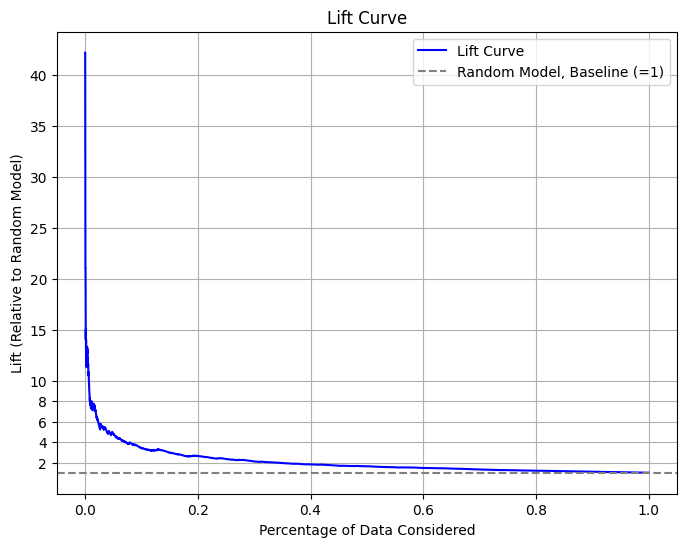

In [403]:
lift_curve(targets_test,predictions_test)

Interpretation:



High Initial Lift (~40x at very low percentages): The model is highly effective at prioritizing top donors, significantly outperforming random selection.


Steady Decline as More Data is Considered: Lift drops as lower-probability donors are included.


At ~50% Data Considered, Lift ~2: The model still performs twice as well as random guessing even after selecting half the dataset.


Converging to Baseline (Lift = 1): When nearly all data is considered, the model’s advantage diminishes.


This suggests the model is highly efficient for donor prioritisation, allowing the non-profit to focus on a small subset of highly likely donors while maximizing outreach efficiency.

# Interpreting and Explaining Models

So for, the following steps have been completed:

1. Build the model (including train-test split, forward stepwise variables selection, ensuring generalisation)

2. Evaluate model using AUC

3. Evaluate model using cumulative gains and lift curves

Now, I'll do the last step -

4. Intepret the variables in the model and verify whether the relationship between these variables and the target makes sense

This can be done using predictor insight graphs.




###Predictor Insight Graphs

These graphs show the relationship between the predictive variables and the target we wish to predict.

We can inspect the PIGs for the variables in our model - ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'age', 'income_high']

#### PIG Income


In [11]:
donations.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166,87,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90,90,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125,74,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117,97,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80,80,80.00,1


In [51]:
pig_income = pd.DataFrame(columns=['income', 'count', 'incidence'])
pig_income

,income,count,incidence


In [52]:
print(donations['income_high'].value_counts()[1])

print(donations[donations['income_high'] == 1]['target'].value_counts())

4108
target
0    3861
1     247
Name: count, dtype: int64


In [53]:
for income in ['income_low','income_high']:

  count = donations[income].value_counts()[1]

  incidence = donations[donations[income] == 1]['target'].value_counts()[1] / count

  pig_income = pd.concat([pig_income, pd.DataFrame([{'income': income, 'count': count, 'incidence': incidence}])], ignore_index=True)



count_avg = donations['target'].value_counts()[1] / len(donations)

avg_row = pd.DataFrame([{'income':'average', 'count':len(donations), 'incidence':count_avg}])

pig_income = pd.concat([pig_income.iloc[:1], avg_row, pig_income.iloc[1:]], ignore_index=True)



pig_income

<ipython-input-53-ab3b830ece29>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pig_income = pd.concat([pig_income, pd.DataFrame([{'income': income, 'count': count, 'incidence': incidence}])], ignore_index=True)


,income,count,incidence
0,income_low,5205,0.040538
1,average,25000,0.047480
2,income_high,4108,0.060127


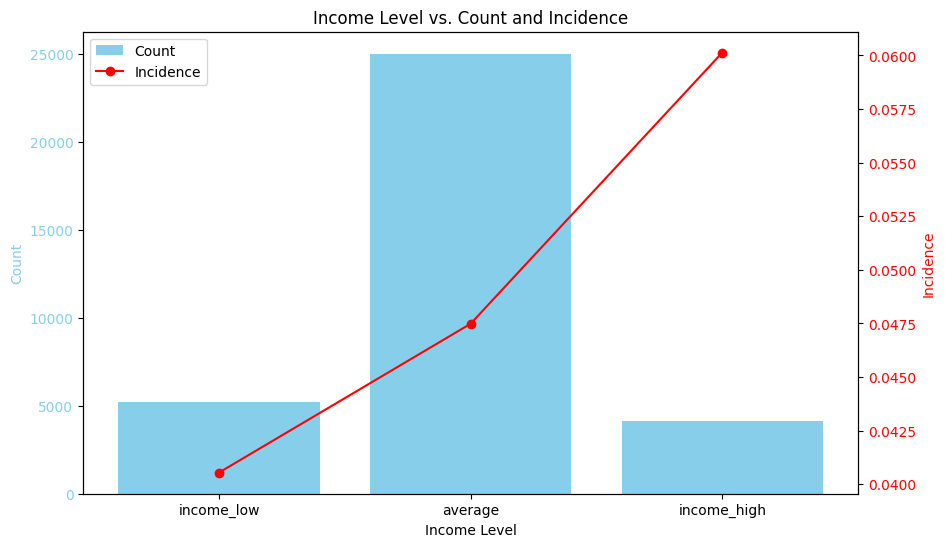

In [54]:
# plot with pig_income, x axis should be income, bars indication count (left y axi), and line chart indicating incidence (right y axis)

import matplotlib.pyplot as plt

# Assuming pig_income DataFrame is already created as shown in the previous code

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
ax1.bar(pig_income['income'], pig_income['count'], color='skyblue', label='Count')
ax1.set_xlabel("Income Level")
ax1.set_ylabel("Count", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for incidence
ax2 = ax1.twinx()
ax2.plot(pig_income['income'], pig_income['incidence'], color='red', marker='o', label='Incidence')
ax2.set_ylabel("Incidence", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.title("Income Level vs. Count and Incidence")

plt.show()

The chart shows a significantly higher incidence of donations in the high income group (6%) vs the low income group (4%)

Similarly, predictor insight graphs can be constructed for other predictors as well.